In [1]:
import pandas as pd
import numpy as np
import pickle

In [57]:
data = pd.read_csv('hun_szotar_data.csv')
data = data[['word', 'frequency']]

with open('word_freq.pkl', 'rb') as f:
    WORDS = pickle.load(f)

freqs = np.zeros(len(data))
for idx, word in enumerate(data['word']):
    freqs[idx] = WORDS.get(word, 'nan')


data['frequency1'] = freqs

In [58]:
del WORDS
data = data.dropna()

WORDS = dict(data[['word', 'frequency1']].values)

In [121]:
def edits1(word):
    "all edits that are one edit away from word"
    letters = ['a', 'á', 'b', 'c', 'cs', 'd', 'dz', 'dzs', 'e', 'é', 'f', 'g', 'gy', 'h', 'i', 'í', 'j', 'k', 'l', 'ly', 'm', 'n', 'ny', 'o', 'ó', 'ö', 'ő', 'p', 'r', 's', 'sz', 't', 'ty', 'u', 'ú', 'ü', 'ű', 'v', 'z', 'zs']
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def known(words): return set(w for w in words if w in WORDS)

def edits2(word): return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def P(word, N=sum(WORDS.values())):
    if word not in WORDS: return 0
    return WORDS[word] / N

def correction(word): 
    return max(candidates(word), key=P)

def candidates(word): 
    return known([word]) or known(edits1(word)) or known(edits2(word)) or [word]

In [122]:
test = ['orgyillos', 'gója', 'betjár', 'maec', 'mott', 'devany']
[correction(word) for word in test]


['orgyilkos', 'gólya', 'bejár', 'meg', 'most', 'dívány']

In [61]:
[(word, P(word)) for word in candidates('betjar')]

[('bejár', 8.209677694368856e-06), ('betör', 4.42059568158323e-06)]

In [62]:
WORDS

{'abajgat': 2.0,
 'abakusz': 20.0,
 'abál': 1.0,
 'abaposztó': 3.0,
 'abbahagy': 4.0,
 'abbamarad': 8.0,
 'ábécé': 78.0,
 'ablak': 631.0,
 'ábra': 506.0,
 'abrak': 29.0,
 'abrakadabra': 8.0,
 'ábránd': 32.0,
 'ábrázat': 10.0,
 'ábrázol': 14.0,
 'abroncs': 55.0,
 'abrosz': 12.0,
 'acél': 372.0,
 'achtel': 2.0,
 'ács': 164.0,
 'ácsi': 17.0,
 'ácsol': 2.0,
 'ácsorog': 5.0,
 'ad': 1240.0,
 'adag': 137.0,
 'adalék': 78.0,
 'ádámcsutka': 6.0,
 'ádámkosztüm': 1.0,
 'adandó': 12.0,
 'adás': 401.0,
 'adásvétel': 23.0,
 'adat': 1304.0,
 'adatbank': 97.0,
 'adatlap': 148.0,
 'ádáz': 14.0,
 'addig': 422.0,
 'adjonisten': 7.0,
 'adó': 1112.0,
 'adogat': 2.0,
 'adoma': 15.0,
 'adomány': 85.0,
 'adós': 69.0,
 'adósság': 191.0,
 'adott': 208.0,
 'adottság': 24.0,
 'adu': 66.0,
 'áfonya': 25.0,
 'ág': 551.0,
 'aga': 61.0,
 'ágál': 5.0,
 'agancs': 32.0,
 'agár': 45.0,
 'ágazat': 136.0,
 'agg': 53.0,
 'aggály': 5.0,
 'aggastyán': 11.0,
 'aggaszt': 12.0,
 'aggat': 3.0,
 'agglegény': 30.0,
 'aggodalom': 22

In [54]:
len(list(edits2('retek')))

220005

In [63]:
import matplotlib.pyplot as plt

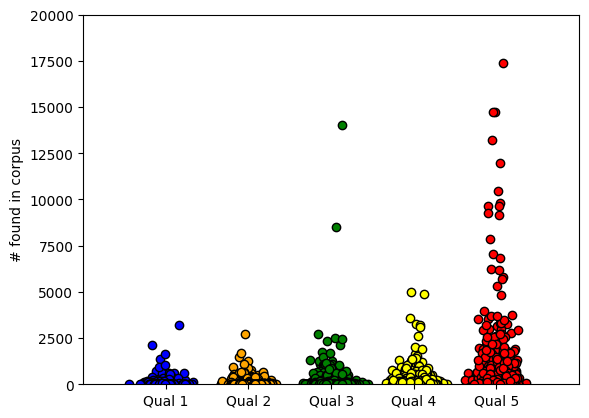

In [112]:
one = data['frequency1'][data['frequency'] == 1]
two = data['frequency1'][data['frequency'] == 2]
three = data['frequency1'][data['frequency'] == 3]
four = data['frequency1'][data['frequency'] == 4]
five = data['frequency1'][data['frequency'] == 5]


plt.plot(np.random.randn(len(one))/10, one, 'ko', markerfacecolor='b')
plt.plot(np.random.randn(len(two))/10+1, two, 'ko', markerfacecolor='orange')
plt.plot(np.random.randn(len(three))/10+2, three, 'ko', markerfacecolor='green')
plt.plot(np.random.randn(len(four))/10+3, four, 'ko', markerfacecolor='yellow')
plt.plot(np.random.randn(len(five))/10+4, five, 'ko', markerfacecolor='red')


plt.xlim([-1, 5])
plt.xticks([0, 1, 2, 3, 4],labels=['Qual 1','Qual 2', 'Qual 3', 'Qual 4', 'Qual 5'])
plt.ylabel('# found in corpus')
plt.ylim([0, 20000])

plt.show()

In [96]:
import seaborn as sns

<Axes: xlabel='frequency', ylabel='frequency1'>

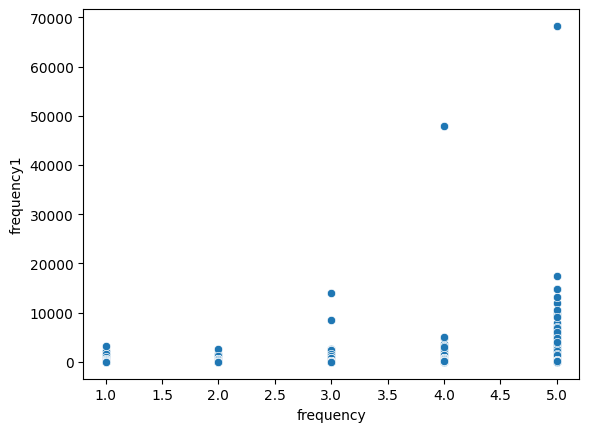

In [97]:
sns.scatterplot(x=data['frequency'], y=data['frequency1'])

In [111]:
sns.histplot(data, x='' , hue='frequency')

ValueError: Could not interpret value `xd` for `x`. An entry with this name does not appear in `data`.

In [123]:

words_string = "dinnye Mókus bodri kutya Könyv hajó tisza Misi Mókus Osztály tolltartó csillag Kutya Író hallgat ádám Macska mongya pécs sára Újság dobban balogh"


for word in words_string.split():
    print(f"{word} -> {correction(word)}")


dinnye -> dinnye
Mókus -> mókus
bodri -> bor
kutya -> kupa
Könyv -> könyv
hajó -> hajó
tisza -> tiszt
Misi -> ii
Mókus -> mókus
Osztály -> osztály
tolltartó -> tolltartó
csillag -> csillag
Kutya -> utca
Író -> író
hallgat -> hallgat
ádám -> ádáz
Macska -> macska
mongya -> monda
pécs -> mécs
sára -> sárga
Újság -> újság
dobban -> jobban
balogh -> balog


In [118]:

WORDS['kutya']

KeyError: 'kutya'